In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('neeraj.png')

In [3]:
cv2.imshow('img',img)
cv2.waitKey(0)

-1

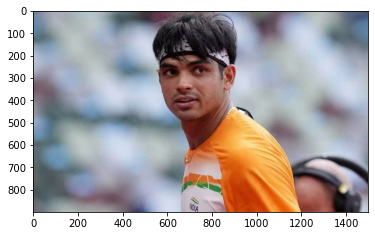

In [5]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [6]:
img.shape

(899, 1499, 3)

In [7]:
red_plane = img[:,:,2].copy()
green_plane = img[:,:,1].copy()
blue_plane = img[:,:,0].copy()

In [8]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [13]:
img_yellow = cv2.subtract(img_gray, blue_plane)

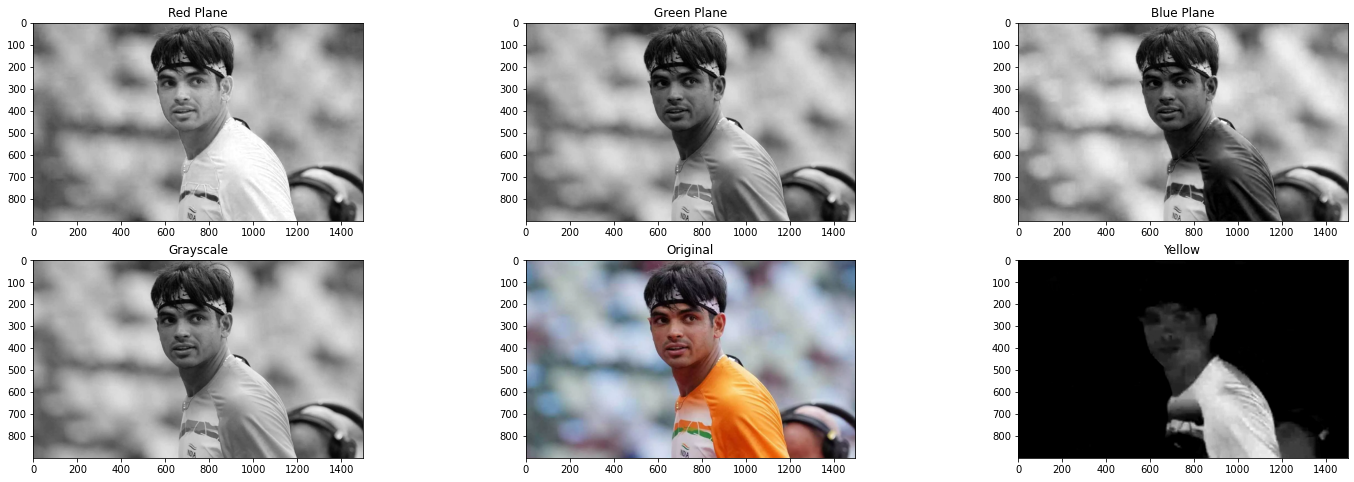

In [14]:
plt.figure(figsize=(25,8))
plt.subplot(2,3,1)
plt.imshow(red_plane,cmap='gray')
plt.title('Red Plane')
plt.subplot(2,3,2)
plt.imshow(green_plane,cmap='gray')
plt.title('Green Plane')
plt.subplot(2,3,3)
plt.imshow(blue_plane,cmap='gray')
plt.title('Blue Plane')

plt.subplot(2,3,4)
plt.imshow(img_gray,cmap='gray')
plt.title('Grayscale')

plt.subplot(2,3,5)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(2,3,6)
plt.imshow(img_yellow,cmap='gray')
plt.title('Yellow')
plt.show()

In [21]:
y, yellow_th = cv2.threshold(img_yellow, 50,255, cv2.THRESH_BINARY)

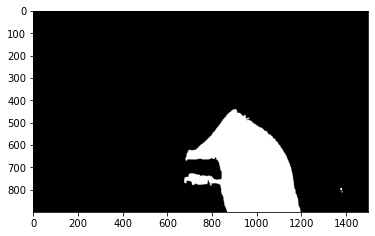

In [22]:
plt.imshow(yellow_th, cmap='gray')

In [23]:
row, col, plane = img.shape

In [24]:
row

899

In [25]:
col

1499

In [26]:
plane

3

In [51]:
img_copy = img.copy()

In [31]:
type(img_copy[r,c,2])

numpy.uint8

In [32]:
import numpy as np

In [34]:
np.array([100],dtype=np.uint8)[0]

100

In [52]:
for r in range(row):
    for c in range(col):
        if yellow_th[r,c] == 255:
#             img_copy[r,c,2] = np.add(img_copy[r,c,2],np.uint16(100))
#             img_copy[r,c,1] = np.subtract(img_copy[r,c,1],np.uint16(100))
#             img_copy[r,c,0] = np.subtract(img_copy[r,c,0],np.uint16(100))
#             img_copy[r,c,2] = img_copy[r,c,2]+100
#             img_copy[r,c,1] = img_copy[r,c,1]-100
#             img_copy[r,c,0] = img_copy[r,c,0]-100
            
            img_copy[r,c,2] = cv2.add(img_copy[r:r+1,c:c+1,2],img_copy[r:r+1,c:c+1,2])
            img_copy[r,c,1] = cv2.subtract(img_copy[r:r+1,c:c+1,1],img_copy[r:r+1,c:c+1,1])
            img_copy[r,c,0] = cv2.subtract(img_copy[r:r+1,c:c+1,0],img_copy[r:r+1,c:c+1,0])

In [53]:
cv2.imshow('img',img_copy)
cv2.waitKey(0)

-1

In [72]:
img2 = cv2.imread('neeraj2.png')
img3 = cv2.imread('neeraj3.png')

In [73]:
img4 = cv2.imread('virat.jpg')

Text(0.5, 1.0, 'Virat')

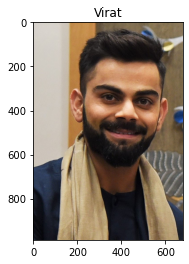

In [74]:
plt.imshow(cv2.cvtColor(img4,cv2.COLOR_BGR2RGB))
plt.title('Virat')

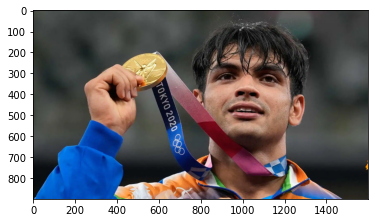

In [75]:
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))

In [76]:
orb = cv2.ORB_create()

In [77]:
kp1, des1 = orb.detectAndCompute(img,None)
kp2, des2 = orb.detectAndCompute(img2,None)
kp3, des3 = orb.detectAndCompute(img3,None)
kp4, des4 = orb.detectAndCompute(img4,None)

In [78]:
len(kp1)

500

In [80]:
len(des1)

500

In [81]:
des1

array([[183,  96, 210, ...,  25, 248, 134],
       [165, 239, 229, ..., 217, 240, 129],
       [175, 174, 164, ...,  93, 248, 206],
       ...,
       [ 90,  17, 250, ..., 164, 111,  75],
       [ 27,  54,  98, ..., 228,  47, 221],
       [ 99, 168, 148, ...,   4, 202,  12]], dtype=uint8)

In [82]:
des1.shape

(500, 32)

In [83]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [84]:
match12 = bf.match(des1,des2)

In [86]:
len(match12)

126

In [87]:
match23 = bf.match(des2,des3)

In [88]:
len(match23)

139

In [89]:
match14 = bf.match(des1,des4)
len(match14)

146

In [90]:
match13 = bf.match(des1,des3)
len(match13)

118

In [91]:
img5 = cv2.imread('messi.jpg')
img6 = cv2.imread('messi2.jpg')

In [92]:
kp5, des5 = orb.detectAndCompute(img5,None)
kp6, des6 = orb.detectAndCompute(img6,None)

In [93]:
match15 = bf.match(des1,des5)
len(match15)

124

In [94]:
match16 = bf.match(des1,des6)
len(match16)

148

In [95]:
match12 = sorted(match12, key=lambda x:x.distance)

In [99]:
img12 = None

In [103]:
img12 = cv2.drawMatches(img,kp1,img2,kp2, matches[:50],img12, flags = 2)


In [104]:
cv2.imshow('matching',img12)
cv2.waitKey(0)

-1

In [105]:
match23 = sorted(match23, key=lambda x:x.distance)

In [107]:
img23 = None
img23 = cv2.drawMatches(img2,kp2,img3,kp3, matches[:50],img23, flags = 2)
cv2.imshow('matching',img23)
cv2.waitKey(0)

-1

In [108]:
# HOG

In [109]:
hog = cv2.HOGDescriptor()

In [110]:
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [111]:
img7 = cv2.imread('people.jpg')

In [112]:
cv2.imshow('i',img7)
cv2.waitKey(0)

-1

In [113]:
b,w = hog.detectMultiScale(img7, winStride=(8,8))

In [114]:
b

array([[ 68,  17, 186, 372],
       [180,  14, 182, 363],
       [396,   4, 188, 375],
       [294,  16, 197, 393],
       [ 88,  96,  73, 145],
       [331, 160,  65, 130],
       [324,  40,  74, 148]], dtype=int32)

In [115]:
len(b)

7

In [116]:
len(w)

7

In [117]:
w

array([[0.29939986],
       [0.98221565],
       [1.78029389],
       [0.8357737 ],
       [0.82096147],
       [0.47220738],
       [0.16375312]])

In [122]:
! pip install imutils

In [121]:
from imutils.object_detection import non_max_suppression

In [127]:
img7 = cv2.imread('people.jpg')
b,w = hog.detectMultiScale(img7, winStride=(8,8))
boxes = non_max_suppression(np.array([[x,y,x+h,y+w] for x,y,h,w in b]), probs=None, overlapThresh=0.7)
for x,y,x2,y2 in boxes:
    cv2.rectangle(img7, (x,y), (x2, y2), (0,0,255), 2)
cv2.imshow('i',img7)
cv2.waitKey(0)

-1

In [130]:
vid = cv2.VideoCapture(0)
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

fd = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
while True:
    r,image = vid.read()
    if r:
        fboxes = fd.detectMultiScale(image, 1.1, 4)
        for x,y,w,h in fboxes:
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0),2)
        
        b,w = hog.detectMultiScale(image, winStride=(8,8))
        boxes = non_max_suppression(np.array([[x,y,x+w,y+h] for x,y,w,h in b]), probs=None, overlapThresh=0.7)
        if len(boxes):
            print('Detected Person',len(boxes))
        for x,y,x2,y2 in boxes:
            cv2.rectangle(image, (x,y), (x2, y2), (0,0,255), 2)
        cv2.imshow('i',image)
        if cv2.waitKey(1) == ord('q'):
            break
    else:
        break
cv2.destroyAllWindows()
vid.release()

Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 2
Detected Person 2
Detected Person 1
Detected Person 2
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 2
Detected Person 1
Detected Person 2
Detected Person 1
Detected Person 2
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 2
Detected Person 1
Detected Person 2
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 2
Detected Person 1
Detected Person 2
Detected Person 2
Detected Person 2
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 1
Detected Person 2
Detected Person 2
Detected Person 1
